In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
# Import the required modules
import numpy as np
import pylab as pl
import scipy as sci
from scipy import optimize
from ridder import *
from newtonRaphson import *
from bisection import *

## Solving algebraic equations

**Problem**: Solve the equation $$x-cos(x)=0$$.

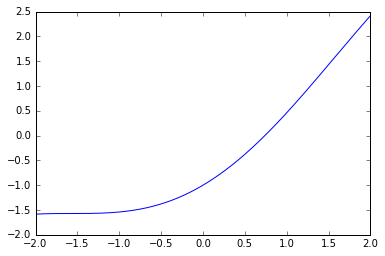

In [24]:
# First plot the function to see how many roots it might have and roughly where they are
x=np.linspace(-2,2,1000)
y=x-np.cos(x)
plot(x,y)

In [25]:
# Define the function in f(x)=0 and its derivative (latter needed for the Newton method) 
def f(z):
    return z-np.cos(z)

def df(z):
    return 1.0-np.sin(z)

In [26]:
# Bisection method - needs the function, root bracketing interval and tolerance 
root_bisection=bisection(f,0.0,1.0,1.e-12)
print(root_bisection)

will need  29  bisections
0.739085133187


In [27]:
# Ridder's method - needs the function and root bracketing interval
root_ridder = ridder(f,0.,1.)
print(root_ridder)

0.739085133215


In [28]:
# Newton-Raphson method - needs the function, its derivative and root bracketing interval
root_newton = newtonRaphson(f,df,0.,1.)
print(root_newton)

0.739085133501


In [29]:
# Internal ('fsolve') routine - needs the function and a rough estimate of the root only
# (plus some optional arguments - e.g. tolerance, see help for details)
root_solve=sci.optimize.fsolve(f,0.5)
print(root_solve)

[ 0.73908513]


## Roots of polynomials

**Problem**: Find the roots of the polynomial $$f(x) = x^4 − 6.4x^3 + 6.45x^2 + 20.538x − 31.752$$.


In [46]:
coeff = [1.0,-6.4,6.45,20.538,-31.752]
np.roots(coeff)


array([-1.8       ,  4.        ,  2.09999997,  2.10000003])

## Solving systems of algebraic equations

**Problem**: Determine the points of intersection between the circle $x^2 + y^2 = 3$ and the hyperbola $xy = 1$.


In [35]:
# Newton-Raphson method for systems of equations
from newtonRaphson2 import *

# First set up the system of equations - note that it is a vector of equations!
def f(x):
    return np.array([x[0]**2+x[1]**2-3,x[0]*x[1]-1])

In [36]:
# Initial guess for the roots (e.g. from plotting the two functions) - again a vector
x0=array([0.5,1.5])

In [48]:
# Call solver - requires the vector of functions and the vector of initial conditions, 
# as well as an optional tolerance
roots=newtonRaphson2(f,x0,tol=1.e-9)
print(roots)
roots_solve=sci.optimize.fsolve(f,x0)
print(roots_solve)

[ 0.61803399  1.61803399]
[ 0.61803399  1.61803399]


**Question**: How many solutions in total does the system above have? 

**Answer**: While above roots are certainly correct, there are also several other solutions (again, plotting will help, or considering the properties of the system):

±(0.618034, 1.618034) and ± (1.618034, 0.618034)

are all solutions, since changing x<=>y or x<=>-x and y<=>-y also yield valid solutions.